# S&P 500

In [1]:
# impporing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

import warnings
warnings.filterwarnings("ignore")

In [2]:
start = datetime(2000,1,1)
end = datetime(2021,3,3)

In [3]:
#read data

spy = web.DataReader("SPY", "yahoo", start = start, end = end)

In [4]:
spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,147.500000,146.250000,146.843750,146.875000,3172700.0,98.155983
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,97.195297
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,93.394386
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,93.561424
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,92.057793
...,...,...,...,...,...,...
2021-02-25,391.880005,380.779999,390.410004,382.329987,146670500.0,378.626190
2021-02-26,385.579987,378.230011,384.350006,380.359985,152701600.0,376.675262
2021-03-01,390.920013,380.570007,385.589996,389.579987,105348800.0,385.805939


In [6]:
spy.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5326.000000,5326.000000,5326.000000,5326.000000,5.326000e+03,5326.000000
mean,168.111668,166.033366,167.123839,167.122912,1.113280e+08,141.430230
std,69.839347,69.306655,69.597143,69.599635,9.716378e+07,76.555183
min,70.000000,67.099998,67.949997,68.110001,1.436600e+06,52.985550
25%,117.592497,115.905001,116.910004,116.700003,4.873785e+07,86.190504
50%,140.285004,138.060005,139.294998,139.290627,8.221725e+07,106.038658
75%,208.914997,206.977497,207.905003,208.007496,1.479940e+08,185.450310
max,394.170013,391.529999,393.959991,392.640015,8.710263e+08,388.836334


In [7]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5326 entries, 1999-12-31 to 2021-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5326 non-null   float64
 1   Low        5326 non-null   float64
 2   Open       5326 non-null   float64
 3   Close      5326 non-null   float64
 4   Volume     5326 non-null   float64
 5   Adj Close  5326 non-null   float64
dtypes: float64(6)
memory usage: 291.3 KB


In [8]:
spy.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,147.50000,146.250000,146.84375,146.8750,3172700.0,98.155983
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,97.195297
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,93.394386
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,93.561424
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,92.057793


In [9]:
returns = spy.Close.pct_change().dropna()

In [10]:
returns

Date
2000-01-03   -0.009787
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
                ...   
2021-02-25   -0.024096
2021-02-26   -0.005153
2021-03-01    0.024240
2021-03-02   -0.007803
2021-03-03   -0.013246
Name: Close, Length: 5325, dtype: float64

Text(0, 0.5, 'PCT returns')

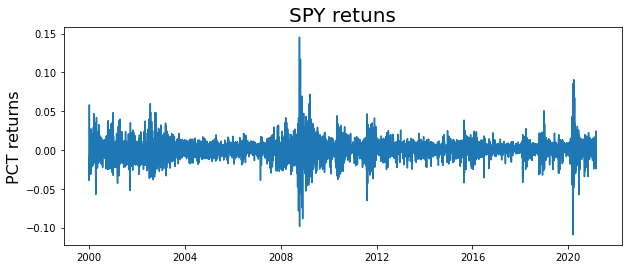

In [12]:
plt.figure(figsize = (10,4))
plt.plot(returns)
plt.title("SPY retuns", fontsize = 20)
plt.ylabel("PCT returns", fontsize = 16)

# PACF PLOT

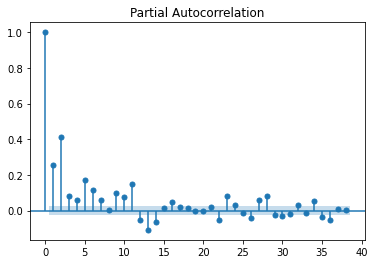

In [13]:
plot_pacf(returns**2)
plt.show()

**On the basis of PACF plot we can try GARCH(2,2) model** 

# FIT GARCH(2,2) model

In [14]:
model = arch_model(returns, p = 2, q= 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5.347276954429955e+22
Iteration:      2,   Func. Count:     25,   Neg. LLF: 118397084569894.45
Iteration:      3,   Func. Count:     42,   Neg. LLF: 2.3283345630223432e+24
Iteration:      4,   Func. Count:     59,   Neg. LLF: 1.7698937722685788e+25
Iteration:      5,   Func. Count:     76,   Neg. LLF: 1.3482812312412126e+21
Iteration:      6,   Func. Count:     91,   Neg. LLF: 13440333362400.19
Iteration:      7,   Func. Count:    108,   Neg. LLF: 1.243204721011261e+18
Iteration:      8,   Func. Count:    122,   Neg. LLF: -17182.014039566722
Optimization terminated successfully    (Exit mode 0)
            Current function value: -17182.014036897872
            Iterations: 12
            Function evaluations: 122
            Gradient evaluations: 8


In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                17182.0
Distribution:                  Normal   AIC:                          -34352.0
Method:            Maximum Likelihood   BIC:                          -34312.5
                                        No. Observations:                 5325
Date:                Wed, Dec 01 2021   Df Residuals:                     5324
Time:                        14:58:32   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.5177e-04  5.061e-06    128.795      0.000 [6.419e-04,6.617e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1442e-06  1.186e-11  2.652e+05      0.000 [3.144e-06,3.144e-06]
alpha[1]       0.1000  2.462e-02      4.061  4.879e-05   [5.174e-02,  0.148]
alpha[2]       0.1000  9.334e-02      1.071      0.284  [-8.294e-02,  0.283]
beta[1]        0.3900      0.738      0.528      0.597     [ -1.057,  1.837]
beta[2]        0.3900      0.662      0.589      0.556     [ -0.907,  1.687]
============================================================================

Covariance estimator: robust
"""

**The coefficient values of GARCH(2,2) models are not that significant..we should try another model** 

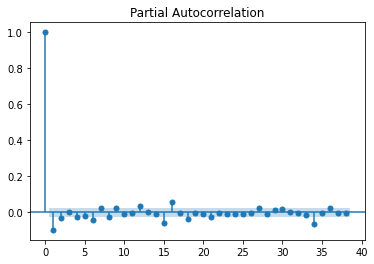

In [16]:
plot_pacf(returns)
plt.show()

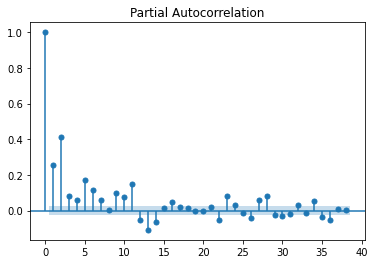

In [17]:
plot_pacf(returns**2)
plt.show()

# FIT GARCH(5,5) 

In [18]:
model_1 = arch_model(returns, p= 5, q= 5)
model1_fit = model_1.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 110858010435.10376
Iteration:      2,   Func. Count:     36,   Neg. LLF: -17120.492477921005
Optimization terminated successfully    (Exit mode 0)
            Current function value: -17120.492491019388
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 2


In [19]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                17120.5
Distribution:                  Normal   AIC:                          -34217.0
Method:            Maximum Likelihood   BIC:                          -34138.0
                                        No. Observations:                 5325
Date:                Wed, Dec 01 2021   Df Residuals:                     5324
Time:                        15:13:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.4321e-04  9.646e-05      5.631  1.789e-08 [3.541e-04,7.323e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1442e-06  5.413e-12  5.809e+05      0.000 [3.144e-06,3.144e-06]
alpha[1]       0.0400  5.026e-02      0.796      0.426  [-5.850e-02,  0.138]
alpha[2]       0.0400  8.747e-02      0.457      0.647     [ -0.131,  0.211]
alpha[3]       0.0400      0.136      0.294      0.769     [ -0.227,  0.307]
alpha[4]       0.0400      0.134      0.298      0.766     [ -0.223,  0.303]
alpha[5]       0.0400      0.156      0.256      0.798     [ -0.266,  0.346]
beta[1]        0.1560      0.317      0.492      0.623     [ -0.466,  0.778]
beta[2]        0.1560      2.715  5.745e-02      0.954     [ -5.166,  5.478]
beta[3]        0.1560      4.532  3.442e-02      0.973     [ -8.726,  9.038]
beta[4]        0.1560      2.898  5.384e-02      0.957     [ -5.523,  5.835]
beta[5]        0.1560      0.944      0.165      0.869     [ -1.694,  2.006]
============================================================================

Covariance estimator: robust
"""

# Rolling Forecast

In [23]:
rolling_predictions = []

test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size - i)]
    model = arch_model(returns, p = 2, q = 2)
    model_fit = model.fit(disp= "off")
    pred = model_fit.forecast(horizon = 1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))
    

In [25]:
rolling_predictions = pd.Series(rolling_predictions, index = returns.index[-365*5:])

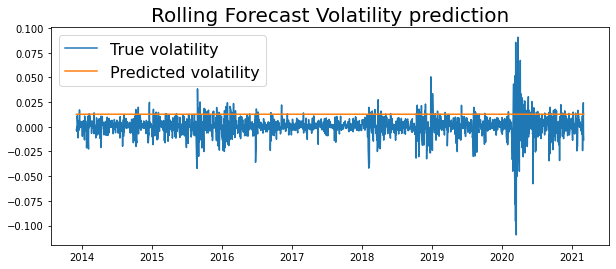

In [26]:
plt.figure(figsize = (10,4))
true, = plt.plot(returns[-365*5:])
pred, = plt.plot(rolling_predictions)
plt.title("Rolling Forecast Volatility prediction", fontsize = 20)
plt.legend(["True volatility", "Predicted volatility"], fontsize = 16)

In [27]:
# Using the model

train = returns
model = arch_model(returns, p= 2, q=2)
model_fit = model.fit(disp = "off")

In [31]:
pred = model_fit.forecast(horizon = 7)
future_dates = [returns.index[-1]+ timedelta(days = i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1, :]), index = future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

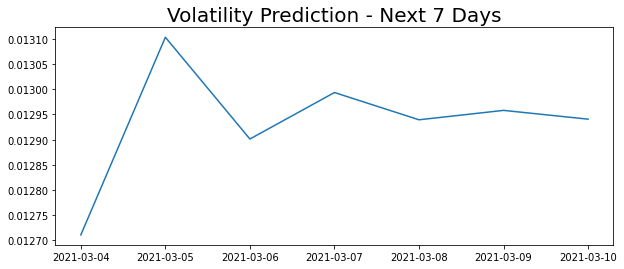

In [32]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)